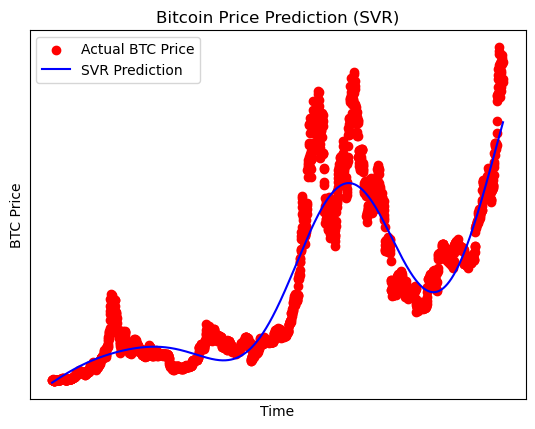

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Load the dataset
dataset = pd.read_csv('linear_interpolation_comp.csv')

# Drop unnecessary columns
dataset = dataset.drop(columns=['market_cap', 'total_volume'])

# Convert 'snapped_at' column to datetime and normalize it
dataset['snapped_at'] = pd.to_datetime(dataset['snapped_at'])
dataset['snapped_at'] = (dataset['snapped_at'] - dataset['snapped_at'].min()) / np.timedelta64(1, 'D')

# Separate independent and dependent variables
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

# Train SVR model
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled, y_scaled.ravel())



# Visualize the SVR model
plt.scatter(X_scaled, y_scaled, color='red', label='Actual BTC Price')
plt.plot(X_scaled, regressor.predict(X_scaled), color='blue', label='SVR Prediction')

plt.title('Bitcoin Price Prediction (SVR)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()



In [2]:
from sklearn.metrics import r2_score
y_pred_scaled = regressor.predict(X_scaled)
# Inverse transform predicted values to original scale
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Reshape y to ensure it's a 1D array
y = y.reshape(-1, 1)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

print("R-squared:", r_squared)

R-squared: 0.8635603017442164


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


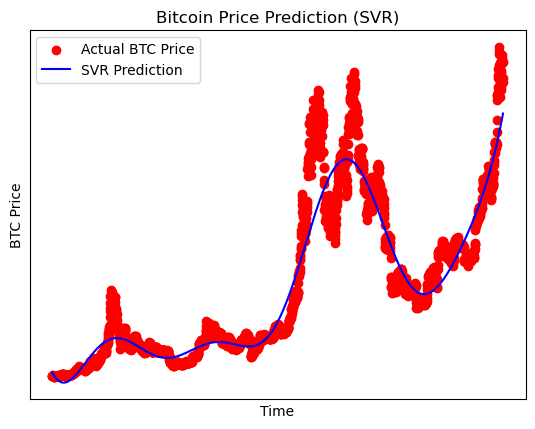

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Load the dataset
dataset = pd.read_csv('linear_interpolation_comp.csv')

# Drop unnecessary columns
dataset = dataset.drop(columns=['market_cap', 'total_volume'])

# Convert 'snapped_at' column to datetime and normalize it
dataset['snapped_at'] = pd.to_datetime(dataset['snapped_at'])
dataset['snapped_at'] = (dataset['snapped_at'] - dataset['snapped_at'].min()) / np.timedelta64(1, 'D')

# Separate independent and dependent variables
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

# Define the SVR model
regressor = SVR()

# Define the hyperparameters grid to search over
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_scaled, y_scaled.ravel())

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_regressor = grid_search.best_estimator_

# Visualize the SVR model
plt.scatter(X_scaled, y_scaled, color='red', label='Actual BTC Price')
plt.plot(X_scaled, best_regressor.predict(X_scaled), color='blue', label='SVR Prediction')

plt.title('Bitcoin Price Prediction (SVR)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()


In [4]:
from sklearn.metrics import r2_score

# Use the best regressor obtained from grid search
best_regressor.fit(X_scaled, y_scaled.ravel())

# Predict using the best regressor
y_pred_scaled = best_regressor.predict(X_scaled)

# Inverse transform predicted values to original scale
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Reshape y to ensure it's a 1D array
y = y.reshape(-1, 1)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

print("R-squared:", r_squared)


R-squared: 0.8991945438153814
